# Import Libararies

In [4]:
import numpy as np
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
%matplotlib inline

# Load dataset

In [5]:
df = pd.read_csv("rideshare_kaggle.csv")
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

In [6]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [7]:
df.describe()

timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.000000       1.280000          1.000000      42.350300   
50%        13.500000       2.160000          1.000000      42.351900   
75%        22.500000       2.920000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  apparentTemperature  precipIntensity  \
count  693071.000000  693071.000000        693071.000000    693071.000000   
mean      -71.066151      39.584388            35.881222         0.008922   
std         0.020302       6.726084             7.918707         0.026901   
min       -71.105400      18.910000            12.130000         0.000000   
25%       -71.081000      36.450000            31.910000         0.000000   
50%       -71.063100      40.490000            35.900000         0.000000   
75%       -71.054200      43.580000            40.080000         0.000000   
max       -71.033000      57.220000            57.220000         0.144700   

       precipProbability       humidity      windSpeed       windGust  \
count      693071.000000  693071.000000  693071.000000  693071.000000   
mean            0.146076       0.741119       6.186253       8.469860   
std             0.328938       0.138595       3.148223       5.289179   
min             0.000000       0.380000       0.450000       0.800000   
25%             0.000000       0.640000       3.410000       4.060000   
50%             0.000000       0.710000       5.910000       7.550000   
75%             0.000000       0.880000       8.410000      11.740000   
max             1.000000       0.960000      15.000000      27.250000   

       windGustTime     visibility  temperatureHigh  temperatureHighTime  \
count  6.930710e+05  693071.000000    693071.000000         6.930710e+05   
mean   1.544049e+09       8.467970        45.040982         1.544050e+09   
std    6.928244e+05       2.602888         5.996541         6.937921e+05   
min    1.543151e+09       0.717000        32.680000         1.543154e+09   
25%    1.543432e+09       8.432000        42.570000         1.543439e+09   
50%    1.543756e+09       9.880000        44.680000         1.543788e+09   
75%    1.544846e+09       9.996000        46.910000         1.544814e+09   
max    1.545127e+09      10.000000        57.870000         1.545160e+09   

       temperatureLow  temperatureLowTime  apparentTemperatureHigh  \
count   693071.000000        6.930710e+05            693071.000000   
mean        34.150736        1.544102e+09                41.614054   
std          6.383163        6.922923e+05                 7.666138   
min         17.850000        1.543234e+09                22.620000   
25%         30.170000        1.543489e+09                36.570000   
50%         34.180000        1.543817e+09                40.950000   
75%         38.730000        1.544836e+09                44.120000   
max         46.600000        1.545221e+09                57.200000   

       apparentTemperatureHighTime  apparentTemperatureLow  \
count             

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [9]:
df.shape

(693071, 57)

# Cleaning Data

## Check Missing Values / Nan-Values

In [10]:
df.isnull().sum().sort_values(ascending=False)

price                          55095
id                                 0
ozone                              0
temperatureLowTime                 0
apparentTemperatureHigh            0
apparentTemperatureHighTime        0
apparentTemperatureLow             0
apparentTemperatureLowTime         0
icon                               0
dewPoint                           0
pressure                           0
windBearing                        0
cloudCover                         0
uvIndex                            0
visibility.1                       0
sunriseTime                        0
temperatureHighTime                0
sunsetTime                         0
moonPhase                          0
precipIntensityMax                 0
uvIndexTime                        0
temperatureMin                     0
temperatureMinTime                 0
temperatureMax                     0
temperatureMaxTime                 0
apparentTemperatureMin             0
apparentTemperatureMinTime         0
a

In [11]:
print('Total Missing Values: ', df.isnull().sum().sum())

Total Missing Values:  55095


In [12]:
print('Total Duplicated Columns : ', df.duplicated().sum())

Total Duplicated Columns :  0


In [13]:
df.dropna(inplace=True)

In [14]:
print('Total Missing Values: ', df.isnull().sum().sum())

Total Missing Values:  0


In [15]:
df.shape

(637976, 57)

## Drop Unnecessary Columns

In [16]:
df= df.drop(df[['id','datetime','timestamp','long_summary','latitude','longitude','product_id',
                'temperatureMin','temperatureMinTime','temperatureMax',
               'temperatureMaxTime','apparentTemperatureMin','apparentTemperatureMinTime',
               'apparentTemperatureMax','apparentTemperatureMaxTime','apparentTemperatureHigh',
               'apparentTemperatureHighTime','apparentTemperatureLow','apparentTemperatureLowTime',
               'temperatureHigh','temperatureHighTime','temperatureLow','temperatureLowTime','apparentTemperature',
               'temperature']], axis=1)

In [17]:
df.shape

(637976, 32)

In [18]:
print('Total Missing Values: ', df.isnull().sum().sum())
print('Total Duplicated Columns : ', df.duplicated().sum())

Total Missing Values:  0
Total Duplicated Columns :  55910


In [19]:
df.drop_duplicates(inplace=True)
print('Total Duplicated Columns : ', df.duplicated().sum())

Total Duplicated Columns :  0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582066 entries, 0 to 693070
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                582066 non-null  int64  
 1   day                 582066 non-null  int64  
 2   month               582066 non-null  int64  
 3   timezone            582066 non-null  object 
 4   source              582066 non-null  object 
 5   destination         582066 non-null  object 
 6   cab_type            582066 non-null  object 
 7   name                582066 non-null  object 
 8   price               582066 non-null  float64
 9   distance            582066 non-null  float64
 10  surge_multiplier    582066 non-null  float64
 11  short_summary       582066 non-null  object 
 12  precipIntensity     582066 non-null  float64
 13  precipProbability   582066 non-null  float64
 14  humidity            582066 non-null  float64
 15  windSpeed           582066 non-nul

### Reset Index

In [21]:
df.index = range(0, len(df))

In [22]:
df

hour  day  month          timezone            source    destination  \
0          9   16     12  America/New_York  Haymarket Square  North Station   
1          2   27     11  America/New_York  Haymarket Square  North Station   
2          1   28     11  America/New_York  Haymarket Square  North Station   
3          4   30     11  America/New_York  Haymarket Square  North Station   
4          3   29     11  America/New_York  Haymarket Square  North Station   
...      ...  ...    ...               ...               ...            ...   
582061    23    1     12  America/New_York          West End      North End   
582062    23    1     12  America/New_York          West End      North End   
582063    23    1     12  America/New_York          West End      North End   
582064    23    1     12  America/New_York          West End      North End   
582065    23    1     12  America/New_York          West End      North End   

       cab_type          name  price  distance  surge_multiplier  \
0          Lyft        Shared    5.0      0.44               1.0   
1          Lyft           Lux   11.0      0.44               1.0   
2          Lyft          Lyft    7.0      0.44               1.0   
3          Lyft  Lux Black XL   26.0      0.44               1.0   
4          Lyft       Lyft XL    9.0      0.44               1.0   
...         ...           ...    ...       ...               ...   
582061     Uber           WAV    9.5      1.00               1.0   
582062     Uber        UberXL   13.0      1.00               1.0   
582063     Uber         UberX    9.5      1.00               1.0   
582064     Uber     Black SUV   27.0      1.00               1.0   
582065     Uber      UberPool   10.0      1.00               1.0   

          short_summary  precipIntensity  precipProbability  humidity  \
0        Mostly Cloudy            0.0000                0.0      0.68   
1                 Rain            0.1299                1.0      0.94   
2                Clear            0.0000                0.0      0.75   
3                Clear            0.0000                0.0      0.73   
4        Partly Cloudy            0.0000                0.0      0.70   
...                 ...              ...                ...       ...   
582061   Partly Cloudy            0.0000                0.0      0.74   
582062   Partly Cloudy            0.0000                0.0      0.74   
582063   Partly Cloudy            0.0000                0.0      0.74   
582064   Partly Cloudy            0.0000                0.0      0.74   
582065   Partly Cloudy            0.0000                0.0      0.74   

        windSpeed  windGust  windGustTime  visibility                   icon  \
0            8.66      9.17    1545015600      10.000   partly-cloudy-night    
1           11.98     11.98    1543291200       4.786                  rain    
2            7.33      7.33    1543334400      10.000           clear-night    
3            5.28      5.28    1543514400      10.000           clear-night    
4            9.14      9.14    1543446000      10.000   partly-cloudy-night    
...           ...       ...           ...         ...                    ...   
582061       2.34      2.87    1543672800       9.785   partly-cloudy-night    
582062       2.34      2.87    1543672800       9.785   partly-cloudy-night    
582063       2.34      2.87    1543672800       9.785   partly-cloudy-night    
582064       2.34      2.87    1543672800       9.785   partly-cloudy-night    
582065       2.34      2.87    1543672800       9.785   partly-cloudy-night    

        dewPoint  pressure  windBearing  cloudCover  uvIndex  visibility.1  \
0          32.70   1021.98           57        0.72        0        10.000   
1          41.83   1003.97           90        1.00        0         4.786   
2          31.10    992.28          240        0.03        0        10.000   
3          26.64   1013.73          310        0.00        0        10.000   
4          28.

# Data Exploration

## Analizing Categorical Columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582066 entries, 0 to 582065
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                582066 non-null  int64  
 1   day                 582066 non-null  int64  
 2   month               582066 non-null  int64  
 3   timezone            582066 non-null  object 
 4   source              582066 non-null  object 
 5   destination         582066 non-null  object 
 6   cab_type            582066 non-null  object 
 7   name                582066 non-null  object 
 8   price               582066 non-null  float64
 9   distance            582066 non-null  float64
 10  surge_multiplier    582066 non-null  float64
 11  short_summary       582066 non-null  object 
 12  precipIntensity     582066 non-null  float64
 13  precipProbability   582066 non-null  float64
 14  humidity            582066 non-null  float64
 15  windSpeed           582066 non-nul

In [24]:
find_categorical = df.select_dtypes(include=['object','category']).columns.tolist()
categorical_col = df[find_categorical]
categorical_col.head()

timezone            source    destination cab_type          name  \
0  America/New_York  Haymarket Square  North Station     Lyft        Shared   
1  America/New_York  Haymarket Square  North Station     Lyft           Lux   
2  America/New_York  Haymarket Square  North Station     Lyft          Lyft   
3  America/New_York  Haymarket Square  North Station     Lyft  Lux Black XL   
4  America/New_York  Haymarket Square  North Station     Lyft       Lyft XL   

     short_summary                   icon  
0   Mostly Cloudy    partly-cloudy-night   
1            Rain                   rain   
2           Clear            clear-night   
3           Clear            clear-night   
4   Partly Cloudy    partly-cloudy-night

In [25]:
for col in categorical_col:
    print(f'{col} : {categorical_col[col].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']

icon : [' partly-cloudy-night ' ' rain ' ' clear-night ' ' cloudy ' ' fog '
 ' clear-day ' ' partly-cloudy-day ']



## Analizing Numerical Columns

In [26]:
find_num = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_col = df[find_num]
num_col.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime'],
      dtype='object')

## Analizing Climate Related Columns

In [27]:
climate_col = df[['precipIntensity','precipProbability','humidity','windSpeed','windGust','windGustTime',
                 'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility','ozone',
                 'sunriseTime','sunsetTime','moonPhase','precipIntensityMax','uvIndexTime']]
climate_col.head()

precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0           0.0000                0.0      0.68       8.66      9.17   
1           0.1299                1.0      0.94      11.98     11.98   
2           0.0000                0.0      0.75       7.33      7.33   
3           0.0000                0.0      0.73       5.28      5.28   
4           0.0000                0.0      0.70       9.14      9.14   

   windGustTime  visibility  dewPoint  pressure  windBearing  cloudCover  \
0    1545015600      10.000     32.70   1021.98           57        0.72   
1    1543291200       4.786     41.83   1003.97           90        1.00   
2    1543334400      10.000     31.10    992.28          240        0.03   
3    1543514400      10.000     26.64   1013.73          310        0.00   
4    1543446000      10.000     28.61    998.36          303        0.44   

   uvIndex  visibility  ozone  sunriseTime  sunsetTime  moonPhase  \
0        0      10.000  303.8   1544962084  1544994864       0.30   
1        0       4.786  291.1   1543232969  1543266992       0.64   
2        0      10.000  315.7   1543319437  1543353364       0.68   
3        0      10.000  291.1   1543492370  1543526114       0.75   
4        0      10.000  347.7   1543405904  1543439738       0.72   

   precipIntensityMax  uvIndexTime  
0              0.1276   1544979600  
1              0.1300   1543251600  
2              0.1064   1543338000  
3              0.0000   1543507200  
4              0.0001   1543420800

In [28]:
climate_col.corr()

precipIntensity  precipProbability  humidity  windSpeed  \
precipIntensity            1.000000           0.837255  0.413346   0.305320   
precipProbability          0.837255           1.000000  0.544712   0.251732   
humidity                   0.413346           0.544712  1.000000  -0.210660   
windSpeed                  0.305320           0.251732 -0.210660   1.000000   
windGust                   0.197644           0.128604 -0.308530   0.938231   
windGustTime              -0.173251          -0.141600 -0.161258  -0.059729   
visibility                -0.597624          -0.758087 -0.695602  -0.034288   
dewPoint                   0.334226           0.440562  0.746644  -0.078956   
pressure                  -0.147106          -0.184297 -0.138592  -0.574102   
windBearing               -0.427662          -0.463484 -0.352286   0.114113   
cloudCover                 0.287715           0.386646  0.483107   0.153425   
uvIndex                   -0.095893          -0.067553 -0.205875   0.066567   
visibility                -0.597624          -0.758087 -0.695602  -0.034288   
ozone                     -0.216068          -0.227797 -0.423719   0.548674   
sunriseTime               -0.178838          -0.143766 -0.163515  -0.056940   
sunsetTime                -0.178818          -0.143745 -0.163504  -0.056884   
moonPhase                  0.078827           0.085987  0.149468   0.035978   
precipIntensityMax         0.494971           0.578707  0.516849   0.210367   
uvIndexTime               -0.178144          -0.142905 -0.162721  -0.056538   

                    windGust  windGustTime  visibility  dewPoint  pressure  \
precipIntensity     0.197644     -0.173251   -0.597624  0.334226 -0.147106   
precipProbability   0.128604     -0.141600   -0.758087  0.440562 -0.184297   
humidity           -0.308530     -0.161258   -0.695602  0.746644 -0.138592   
windSpeed           0.938231     -0.059729   -0.034288 -0.078956 -0.574102   
windGust            1.000000      0.010583    0.038681 -0.178453 -0.512771   
windGustTime        0.010583      1.000000    0.154879 -0.262327  0.533466   
visibility          0.038681      0.154879    1.000000 -0.577036  0.235780   
dewPoint           -0.178453     -0.262327   -0.577036  1.000000 -0.314671   
pressure           -0.512771      0.533466    0.235780 -0.314671  1.000000   
windBearing         0.168284     -0.147848    0.395774 -0.356120 -0.277915   
cloudCover          0.098637     -0.075884   -0.479141  0.501562 -0.284992   
uvIndex             0.087193     -0.026849    0.119324 -0.001192  0.007224   
visibility          0.038681      0.154879    1.000000 -0.577036  0.235780   
ozone               0.588392      0.208113    0.255276 -0.424860 -0.442977   
sunriseTime         0.014987      0.999350    0.155277 -0.268804  0.524516   
sunsetTime          0.015037      0.999350    0.155263 -0.268800  0.524476   
moonPhase           0.000423     -0.854761   -0.177212  0.319863 -0.525588   
precipIntensityMax  0.098888     -0.203658   -0.540827  0.503066 -0.249061   
uvIndexTime         0.015302      0.999356    0.154552 -0.268043  0.524571   

                    windBearing  cloudCover   uvIndex  visibility     ozone  \
precipIntensity       -0.427662    0.287715 -0.095893   -0.597624 -0.216068   
precipProbability     -0.463484    0.386646 -0.067553   -0.758087 -0.227797   
humidity              -0.352286    0.483107 -0.205875   -0.695602 -0.423719   
windSpeed              0.114113    0.153425  0.066567   -0.034288  0.548674   
windGust               0.168284    0.098637  0.087193    0.038681  0.588392   
windGustTime          -0.147848   -0.075884 -0.026849    0.154879  0.208113   
visibility             0.395774   -0.479141  0.119324    1.000000  0.255276   
dewPoint              -0.356120    0.501562 -0.001192   -0.577036 -0.424860   
pressure              -0.277915   -0.284992  0.007224    0.235780 -0.442977   
windBearing            1.000000   -0.222873  0.112333    0.395774  0.337502   
cloudCove

<AxesSubplot:>

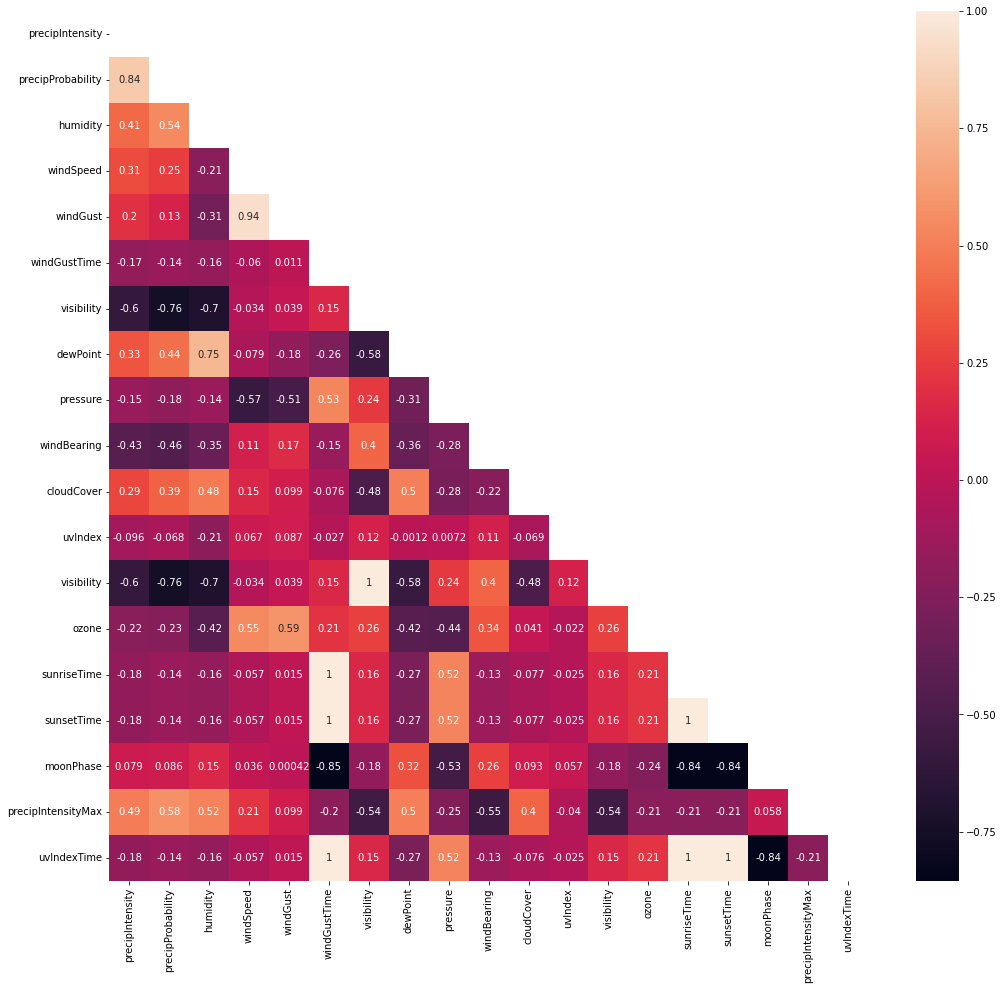

In [29]:
plt.figure(figsize=(17,16))
sns.heatmap(climate_col.corr(),annot=True, mask=np.triu(climate_col.corr()))

### drop climate related columns

In [30]:
df = df.drop(climate_col, axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582066 entries, 0 to 582065
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              582066 non-null  int64  
 1   day               582066 non-null  int64  
 2   month             582066 non-null  int64  
 3   timezone          582066 non-null  object 
 4   source            582066 non-null  object 
 5   destination       582066 non-null  object 
 6   cab_type          582066 non-null  object 
 7   name              582066 non-null  object 
 8   price             582066 non-null  float64
 9   distance          582066 non-null  float64
 10  surge_multiplier  582066 non-null  float64
 11  short_summary     582066 non-null  object 
 12  icon              582066 non-null  object 
 13  visibility.1      582066 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 62.2+ MB


In [32]:
#check any duplicate columns
df.duplicated().sum()

0

## Slice Data based on Cab Type

In [33]:
lyft = df[df['cab_type'] == 'Lyft']
lyft.index = range(0,len(lyft))

In [34]:
Uber = df[df['cab_type'] == 'Uber']
Uber.index = range(0, len(Uber))

## Find Most Popular destination based on cab type

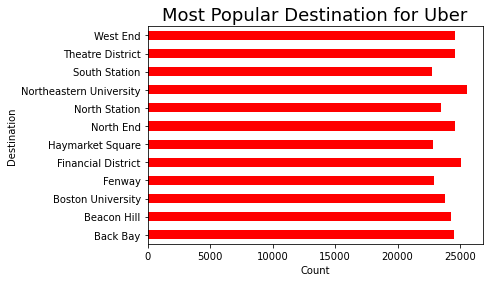

In [35]:
Uber.groupby('destination').size().plot(kind='barh', color='red')
plt.title('Most Popular Destination for Uber', fontsize=18)
plt.xlabel('Count')
plt.ylabel('Destination')
plt.show()

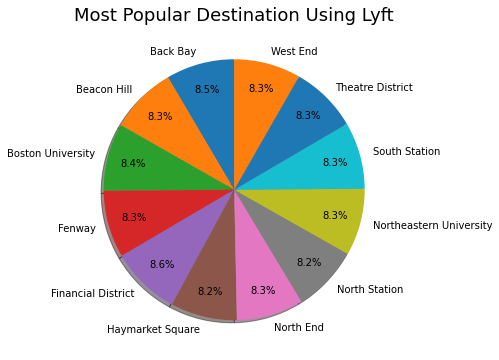

In [36]:
lyft.groupby('destination').size().plot(kind='pie',
            figsize=(17,6),
            autopct = '%1.1f%%',
            startangle=90,
            shadow=True,
            pctdistance=0.8)
plt.title('Most Popular Destination Using Lyft', fontsize=18)
plt.ylabel('')
plt.show()

## Find Total distance of Lyft and Uber

In [37]:
df_cab_type = df.groupby('cab_type', axis=0).sum()
df_cab_type

hour      day    month       price   distance  surge_multiplier  \
cab_type                                                                       
Lyft      3406243  5177823  3397554  5114850.48  645050.90         302663.25   
Uber      3353192  5077442  3352649  4646301.00  645504.96         289006.00   

          visibility.1  
cab_type                
Lyft       2482367.234  
Uber       2444375.093

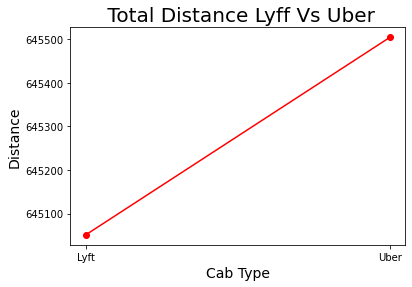

In [38]:
plt.plot(df_cab_type.index, df_cab_type['distance'], marker='o', color='red')
plt.title(' Total Distance Lyff Vs Uber', fontsize=20)
plt.xlabel('Cab Type', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.show()

## Distribution for Uber and Lyft

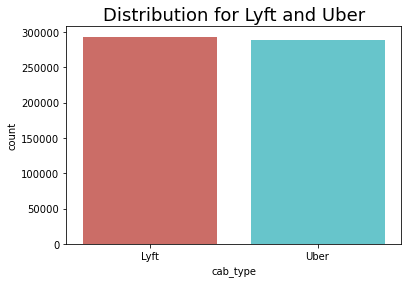

In [39]:
sns.countplot(x='cab_type', data=df, palette='hls')
plt.title('Distribution for Lyft and Uber', fontsize=18)
plt.show()

## Rides by Hour

Text(0.5, 1.0, 'Rides per Hour for Uber')

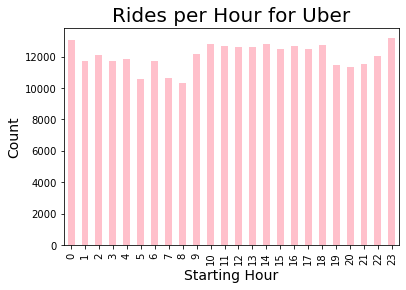

In [40]:
Uber.groupby('hour').size().plot(kind='bar', color='pink')
plt.xlabel('Starting Hour', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Rides per Hour for Uber', fontsize=20)

Text(0, 0.5, 'Count')

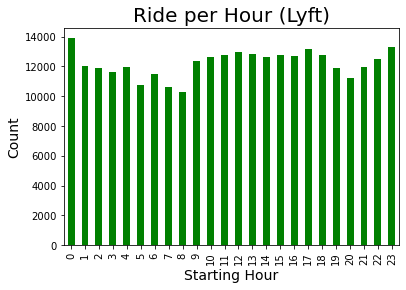

In [41]:
lyft.groupby('hour').size().plot(kind='bar', color='green')
plt.title('Ride per Hour (Lyft)',fontsize=20)
plt.xlabel('Starting Hour', fontsize=14)
plt.ylabel('Count', fontsize=14)

## Most Popular source/ Pick Up Point?

### Most Popular Pick Up points for Lyft

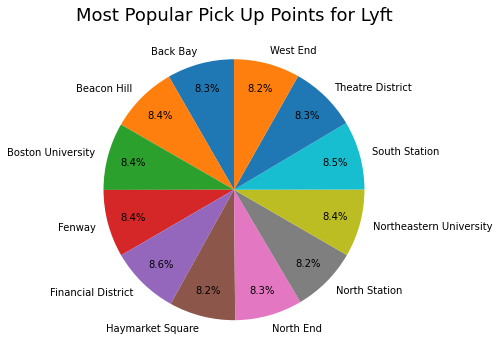

In [42]:
lyft.groupby('source').size().plot(kind='pie',
                                  figsize=(17,6),
                                  autopct = '%1.1f%%',
                                  startangle=90,
                                  shadow=False,
                                  pctdistance=0.8)
plt.title('Most Popular Pick Up Points for Lyft', fontsize=18)
plt.ylabel("")
plt.show()

### Most Popular Pick Up Points for Uber

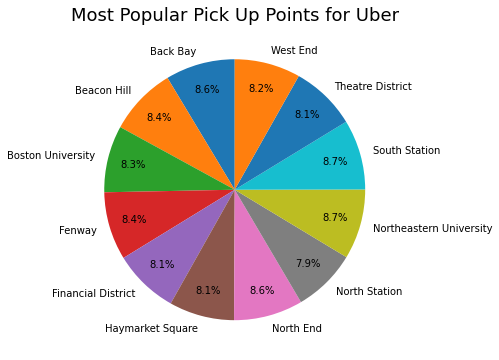

In [43]:
Uber.groupby('source').size().plot(kind='pie',
                                  figsize=(17,6),
                                  autopct = '%1.1f%%',
                                  startangle=90,
                                  shadow=False,
                                  pctdistance=0.8)
plt.title('Most Popular Pick Up Points for Uber', fontsize=18)
plt.ylabel("")
plt.show()

## Days with Most Ride? (Overal)

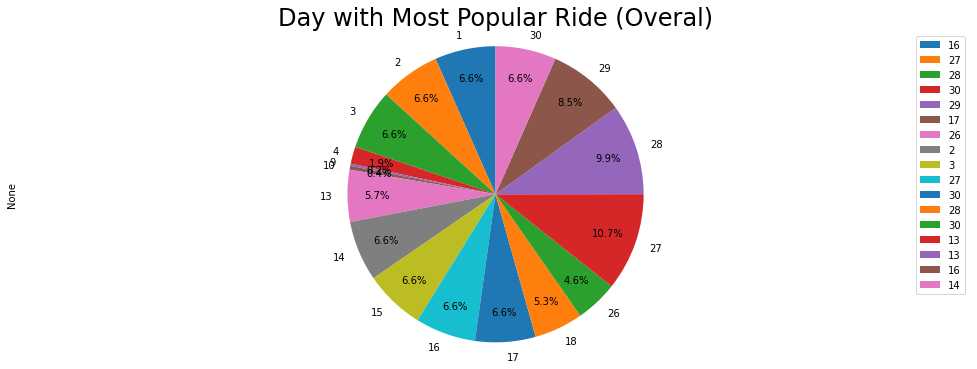

In [44]:
df.groupby('day').size().plot(kind='pie',
                                  figsize=(17,6),
                                  autopct = '%1.1f%%',
                                  startangle=90,
                                  shadow=False,
                                  pctdistance=0.8)
plt.title('Day with Most Popular Ride (Overal)', fontsize=24)
plt.axis('equal')
plt.legend(labels=df['day'] , loc='upper right')
plt.show()

Text(0, 0.5, 'Total Rides')

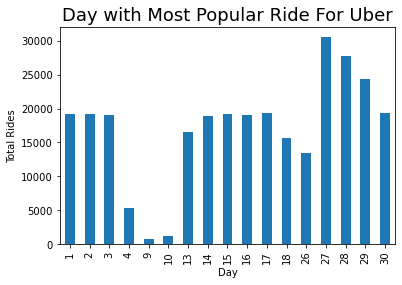

In [45]:
Uber.groupby('day').size().plot(kind='bar')
plt.title('Day with Most Popular Ride For Uber', fontsize=18)
plt.xlabel('Day')
plt.ylabel('Total Rides')

Text(0, 0.5, 'Total Rides')

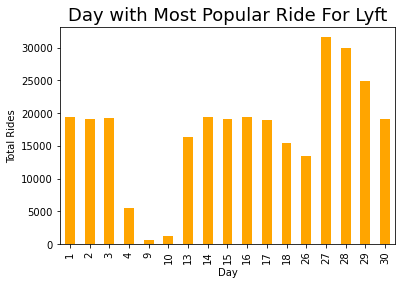

In [46]:
lyft.groupby('day').size().plot(kind='bar', color='orange')
plt.title('Day with Most Popular Ride For Lyft', fontsize=18)
plt.xlabel('Day')
plt.ylabel('Total Rides')

## Analyzing Price 
### Find Mean, Min, and Max Price Based on Pickup point and destination

In [47]:
print('Maximum Uber Price : ', Uber['price'].max())
print('Minimum Uber Price : ', Uber['price'].min())
print('Maximum Lyft Price : ', lyft['price'].max())
print('Minimum Lyft Price : ', lyft['price'].min())

Maximum Uber Price :  89.5
Minimum Uber Price :  4.5
Maximum Lyft Price :  97.5
Minimum Lyft Price :  2.5


In [48]:
# rate price for uber based on source and destination
uber_new = Uber[['source','destination','price']]
uber_new

source destination  price
0       North End    West End   12.0
1       North End    West End   16.0
2       North End    West End    7.5
3       North End    West End    7.5
4       North End    West End   26.0
...           ...         ...    ...
289001   West End   North End    9.5
289002   West End   North End   13.0
289003   West End   North End    9.5
289004   West End   North End   27.0
289005   West End   North End   10.0

[289006 rows x 3 columns]

In [49]:
uber_price = uber_new.groupby(['source','destination']).agg({'price':['mean','min','max']})
uber_price.columns = ['Mean Price', 'Min Price', 'Max Price']
uber_price = uber_price.reset_index()
print(uber_price)

      source              destination  Mean Price  Min Price  Max Price
0   Back Bay        Boston University   13.227556        4.5       46.0
1   Back Bay                   Fenway   12.798275        5.5       51.5
2   Back Bay         Haymarket Square   17.368812        6.5       65.0
3   Back Bay                North End   18.614696        7.0       64.0
4   Back Bay  Northeastern University   12.506298        5.5       48.5
..       ...                      ...         ...        ...        ...
67  West End                   Fenway   17.701148        6.5       51.5
68  West End         Haymarket Square   12.712876        5.5       59.0
69  West End                North End   13.306541        5.5       59.0
70  West End  Northeastern University   18.333059        7.5       68.5
71  West End            South Station   14.595609        5.5       52.5

[72 rows x 5 columns]


In [50]:
lyft_new = lyft[['source','destination','price']]
lyft_new

source    destination  price
0       Haymarket Square  North Station    5.0
1       Haymarket Square  North Station   11.0
2       Haymarket Square  North Station    7.0
3       Haymarket Square  North Station   26.0
4       Haymarket Square  North Station    9.0
...                  ...            ...    ...
293055         North End    Beacon Hill    9.0
293056         North End    Beacon Hill   13.5
293057  Theatre District         Fenway    7.0
293058  Theatre District         Fenway   10.5
293059  Theatre District         Fenway   32.5

[293060 rows x 3 columns]

In [51]:
lyft_price = lyft_new.groupby(['source','destination']).agg({'price':['mean','min','max']})
lyft_price.columns = ['Mean Price', 'Min Price', 'Max Price']
lyft_price = lyft_price.reset_index()
print(lyft_price)

      source              destination  Mean Price  Min Price  Max Price
0   Back Bay        Boston University   15.028158        2.5       55.0
1   Back Bay                   Fenway   14.627389        3.0       55.0
2   Back Bay         Haymarket Square   19.004080        3.0       67.5
3   Back Bay                North End   20.546056        3.0       75.0
4   Back Bay  Northeastern University   13.822053        2.5       55.0
..       ...                      ...         ...        ...        ...
67  West End                   Fenway   18.943096        2.5       65.0
68  West End         Haymarket Square   12.894532        2.5       52.5
69  West End                North End   13.411593        2.5       47.5
70  West End  Northeastern University   19.933016        2.5       67.5
71  West End            South Station   15.722895        2.5       47.5

[72 rows x 5 columns]


# Re-Import Data Set For Modelling

In [52]:
df = pd.read_csv('rideshare_kaggle.csv')

In [53]:
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# Data Cleaning

In [55]:
#Check for Missing Values 
(df.isnull().sum()/len(df))*100

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


In [56]:
#Check for Duplicates 
df.duplicated().sum()

0

In [57]:
#Drop missing values since it is less than 10% 
df.dropna(inplace=True)

In [58]:
#Recheck for missing values 
(df.isnull().sum()/len(df))*100

id                             0.0
timestamp                      0.0
hour                           0.0
day                            0.0
month                          0.0
datetime                       0.0
timezone                       0.0
source                         0.0
destination                    0.0
cab_type                       0.0
product_id                     0.0
name                           0.0
price                          0.0
distance                       0.0
surge_multiplier               0.0
latitude                       0.0
longitude                      0.0
temperature                    0.0
apparentTemperature            0.0
short_summary                  0.0
long_summary                   0.0
precipIntensity                0.0
precipProbability              0.0
humidity                       0.0
windSpeed                      0.0
windGust                       0.0
windGustTime                   0.0
visibility                     0.0
temperatureHigh     

In [59]:
df.shape

(637976, 57)

# Preprocessing Data Set

## Drop Unnecessary Feature

In [60]:
# Drop Unnecessary feature
cols_to_drop = ['id', 'timestamp', 'timezone', 'source', 'destination', 'product_id', 'latitude', 
                'longitude', 'long_summary', 'icon'
                ]
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

hour  day  month             datetime cab_type          name  price  \
0     9   16     12  2018-12-16 09:30:07     Lyft        Shared    5.0   
1     2   27     11  2018-11-27 02:00:23     Lyft           Lux   11.0   
2     1   28     11  2018-11-28 01:00:22     Lyft          Lyft    7.0   
3     4   30     11  2018-11-30 04:53:02     Lyft  Lux Black XL   26.0   
4     3   29     11  2018-11-29 03:49:20     Lyft       Lyft XL    9.0   

   distance  surge_multiplier  temperature  apparentTemperature  \
0      0.44               1.0        42.34                37.12   
1      0.44               1.0        43.58                37.35   
2      0.44               1.0        38.33                32.93   
3      0.44               1.0        34.38                29.63   
4      0.44               1.0        37.44                30.88   

     short_summary  precipIntensity  precipProbability  humidity  windSpeed  \
0   Mostly Cloudy            0.0000                0.0      0.68       8.66   
1            Rain            0.1299                1.0      0.94      11.98   
2           Clear            0.0000                0.0      0.75       7.33   
3           Clear            0.0000                0.0      0.73       5.28   
4   Partly Cloudy            0.0000                0.0      0.70       9.14   

   windGust  windGustTime  visibility  temperatureHigh  temperatureHighTime  \
0      9.17    1545015600      10.000            43.68           1544968800   
1     11.98    1543291200       4.786            47.30           1543251600   
2      7.33    1543334400      10.000            47.55           1543320000   
3      5.28    1543514400      10.000            45.03           1543510800   
4      9.14    1543446000      10.000            42.18           1543420800   

   temperatureLow  temperatureLowTime  apparentTemperatureHigh  \
0           34.19          1545048000                    37.95   
1           42.10          1543298400                    43.92   
2           33.10          1543402800                    44.12   
3           28.90          1543579200                    38.53   
4           36.71          1543478400                    35.75   

   apparentTemperatureHighTime  apparentTemperatureLow  \
0                   1544968800                   27.39   
1                   1543251600                   36.20   
2                   1543320000                   29.11   
3                   1543510800                   26.20   
4                   1543420800                   30.29   

   apparentTemperatureLowTime  dewPoint  pressure  windBearing  cloudCover  \
0                  1545044400     32.70   1021.98           57        0.72   
1                  1543291200     41.83   1003.97           90        1.00   
2                  1543392000     31.10    992.28          240        0.03   
3                  1543575600     26.64   1013.73          310        0.00   
4                  1543460400     28.61    998.36          303        0.44   

   uvIndex  visibility.1  ozone  sunriseTime  sunsetTime  moonPhase  \
0        0        10.000  303.8   1544962084  1544994864       0.30   
1        0         4.786  291.1   1543232969  1543266992       0.64   
2        0        10.000  315.7   1543319437  1543353364       0.68   
3        0        10.000  291.1   1543492370  1543526114       0.75   
4        0        10.000  347.7   1543405904  1543439738       0.72   

   precipIntensityMax  uvIndexTime  temperatureMin  temperatureMinTime  \
0              0.1276   1544979600           39.89          1545012000   
1              0.1300   1543251600           40.49          1543233600   
2              0.1064   1543338000           35.36          1543377600   
3              0.0000   1543507200           34.67          1543550400   
4              0.0001   1543420800           33.10          1543402800   

   temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
0           43.68          1544968800                

In [61]:
#Data Set Info after being perprocessed 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         637976 non-null  int64  
 1   day                          637976 non-null  int64  
 2   month                        637976 non-null  int64  
 3   datetime                     637976 non-null  object 
 4   cab_type                     637976 non-null  object 
 5   name                         637976 non-null  object 
 6   price                        637976 non-null  float64
 7   distance                     637976 non-null  float64
 8   surge_multiplier             637976 non-null  float64
 9   temperature                  637976 non-null  float64
 10  apparentTemperature          637976 non-null  float64
 11  short_summary                637976 non-null  object 
 12  precipIntensity              637976 non-null  float64
 13 

## Preprocessing Categorical Feature

In [62]:
#take categorical column 
categorical = df.select_dtypes('object').columns.tolist()
categorical

['datetime', 'cab_type', 'name', 'short_summary']

In [63]:
#Value counts of Categorical Feature 
print(f'{categorical[0]} Value Counts : ')
print(df[categorical[0]].value_counts())
print(f'{categorical[1]} Value Counts : ')
print(df[categorical[1]].value_counts())
print(f'{categorical[2]} Value Counts : ')
print(df[categorical[2]].value_counts())

datetime Value Counts : 
2018-11-26 23:33:14    151
2018-11-29 02:29:08    149
2018-11-29 02:47:08    146
2018-11-27 00:03:14    146
2018-11-29 04:38:08    146
                      ... 
2018-12-03 07:33:03      3
2018-11-30 21:33:07      3
2018-12-15 06:05:07      3
2018-12-13 15:10:13      1
2018-11-30 13:17:58      1
Name: datetime, Length: 31350, dtype: int64
cab_type Value Counts : 
Uber    330568
Lyft    307408
Name: cab_type, dtype: int64
name Value Counts : 
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64


### Preprocessing Cab Type

In [64]:
#Preprocessed cab_type 
cab_map = {'Uber':1, 'Lyft' : 0}
df['cab_type'] = df['cab_type'].map(cab_map)

In [65]:
df['cab_type']

0         0
1         0
2         0
3         0
4         0
         ..
693065    1
693066    1
693067    1
693069    1
693070    1
Name: cab_type, Length: 637976, dtype: int64

### Preprocessing Weather Condition

In [66]:
#Preprocessed Weather Condition
def pre_rain(val): 
    if val in [' Overcast ', ' Mostly Cloudy ', ' Partly Cloudy ', ' Clear ', ' Foggy ']: 
        val = 0
    else: 
        val = 1
    return val

df['Is_Raining'] = df['short_summary'].apply(pre_rain)
df.drop('short_summary', axis=1, inplace=True)
df['Is_Raining']

0         0
1         1
2         0
3         0
4         0
         ..
693065    0
693066    0
693067    0
693069    0
693070    0
Name: Is_Raining, Length: 637976, dtype: int64

### Preprocessed Type of Service

For uber the difference of service type could be accessed on https://www.ridesharingdriver.com/whats-the-difference-between-uberx-xl-uberplus-and-black-car/

For lyft the difference of service type could be accessed on https://www.ridesharingdriver.com/how-much-does-lyft-cost-lyft-fare-estimator/

In [67]:
#Lyft service type
df[df['cab_type'] == 0].name.value_counts()

Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

Lyft Service Type Order (From Least Expensive): 
1. Shared
2. Lyft
3. Lyft XL
4. Lux
5. Lux Black
6. Lux Black XL

In [68]:
#Uber service type
df[df['cab_type'] == 1].name.value_counts()

UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
UberX        55094
UberPool     55091
Name: name, dtype: int64

Uber Service Type Order (From Least Expensive): 
1. UberPool
2. UberX & WAV
3. UberXL
4. Black
5. Black SUV

In [69]:
#Get Values of Name
df['name'].unique().tolist()

['Shared',
 'Lux',
 'Lyft',
 'Lux Black XL',
 'Lyft XL',
 'Lux Black',
 'UberXL',
 'Black',
 'UberX',
 'WAV',
 'Black SUV',
 'UberPool']

In [70]:
#Create service class based on name feature
def get_class(val): 
    if val in ['Shared', 'UberPool']:
        val = 1
    elif val in ['UberX', 'WAV', 'Lyft']:
        val = 2
    elif val in ['UberXL', 'Lyft XL']:
        val = 3
    elif val in ['Lux', 'Black']:
        val = 4
    elif val in ['Black SUV', 'Lux Black']: 
        val = 5
    else: 
        val = 6
    return val
df['service_class'] = df['name'].apply(get_class)
df.drop('name', axis=1, inplace=True) #Drop Name Feature
df['service_class'].value_counts()

2    161425
3    106331
5    106331
4    106330
1    106324
6     51235
Name: service_class, dtype: int64

## Feature Engineering for Peak Time

According to New York Taxi Rates (https://www.estimate.taxi/rates/united-states/new-york) the peak time of Taxi Rates happens at weekday from 4 PM to 8 PM. Thus, we would like to extract wether the order happened at peak time or not.

In [71]:
#Day name when order is made
df['day_name'] = pd.to_datetime(df['datetime']).dt.day_name()
df['day_name']

0            Sunday
1           Tuesday
2         Wednesday
3            Friday
4          Thursday
            ...    
693065     Saturday
693066     Saturday
693067     Saturday
693069     Saturday
693070     Saturday
Name: day_name, Length: 637976, dtype: object

In [72]:
#Values of day_name 
df['day_name'].unique().tolist()

['Sunday', 'Tuesday', 'Wednesday', 'Friday', 'Thursday', 'Monday', 'Saturday']

In [73]:
#Change day name to day_number
day_enc = {'Sunday' : 7, 'Tuesday' : 2, 'Wednesday' : 3, 'Friday' : 5, 'Thursday' : 4, 'Monday' : 1, 'Saturday' : 6}
df['day_number'] = df['day_name'].map(day_enc)
df['day_number']

0         7
1         2
2         3
3         5
4         4
         ..
693065    6
693066    6
693067    6
693069    6
693070    6
Name: day_number, Length: 637976, dtype: int64

In [74]:
#Filter Data on Weekday 
df_peak_day = df[(df['day_number']>=1) & (df['day_number']<6)]
df_peak_day

hour  day  month             datetime  cab_type  price  distance  \
1          2   27     11  2018-11-27 02:00:23         0   11.0      0.44   
2          1   28     11  2018-11-28 01:00:22         0    7.0      0.44   
3          4   30     11  2018-11-30 04:53:02         0   26.0      0.44   
4          3   29     11  2018-11-29 03:49:20         0    9.0      0.44   
5         18   17     12  2018-12-17 18:25:12         0   16.5      0.44   
...      ...  ...    ...                  ...       ...    ...       ...   
693054     1   29     11  2018-11-29 01:47:08         1   14.0      1.79   
693055     1   29     11  2018-11-29 01:47:08         1    8.5      1.79   
693056     1   29     11  2018-11-29 01:47:08         1    7.0      0.91   
693057     1   29     11  2018-11-29 01:47:08         1   17.0      1.61   
693058     1   29     11  2018-11-29 01:47:08         1   22.0      1.61   

        surge_multiplier  temperature  apparentTemperature  precipIntensity  \
1                    1.0        43.58                37.35           0.1299   
2                    1.0        38.33                32.93           0.0000   
3                    1.0        34.38                29.63           0.0000   
4                    1.0        37.44                30.88           0.0000   
5                    1.0        38.75                33.51           0.0000   
...                  ...          ...                  ...              ...   
693054               1.0        38.42                32.45           0.0000   
693055               1.0        38.42                32.45           0.0000   
693056               1.0        38.42                32.45           0.0000   
693057               1.0        38.42                32.45           0.0000   
693058               1.0        38.42                32.45           0.0000   

        precipProbability  humidity  windSpeed  windGust  windGustTime  \
1                     1.0      0.94      11.98     11.98    1543291200   
2                     0.0      0.75       7.33      7.33    1543334400   
3                     0.0      0.73       5.28      5.28    1543514400   
4                     0.0      0.70       9.14      9.14    1543446000   
5                     0.0      0.84       7.19      8.88    1545022800   
...                   ...       ...        ...       ...           ...   
693054                0.0      0.72       8.41     11.54    1543431600   
693055                0.0      0.72       8.41     11.54    1543431600   
693056                0.0      0.72       8.41     11.54    1543431600   
693057                0.0      0.72       8.41     11.54    1543431600   
693058                0.0      0.72       8.41     11.54    1543431600   

        visibility  temperatureHigh  temperatureHighTime  temperatureLow  \
1            4.786            47.30           1543251600           42.10   
2           10.000            47.55           1543320000           33.10   
3           10.000            45.03           1543510800           28.90   
4           10.000            42.18           1543420800           36.71   
5            8.325            40.61           1545076800           24.07   
...            ...              ...                  ...             ...   
693054       9.915            42.61           1543438800           37.60   
693055       9.915            42.61           1543438800           37.60   
693056       9.915            42.61           1543438800           37.60   
693057       9.915            42.61           1543438800           37.60   
693058       9.915            42.61           1543438800           37.60   

        temperatureLowTime  apparentTemperatureHigh  \
1               1543298400                    43.92   
2               1543402800                    44.12   
3               1543579200                    38.53   
4               1543478400                    35.75   
5               1545130800                    34.97   
...           

In [75]:
#Create Column for Determining Peak Time 
def get_peak_hour(val): 
    if val<= 20 & val>=16: 
        val = 1
    else: 
        val = 0 
    return val
df_peak_day['Is_Peak'] = df_peak_day['hour'].apply(get_peak_hour)
df_peak_day['Is_Peak']

C:\Users\andon\AppData\Local\Temp\ipykernel_21432\1497316340.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peak_day['Is_Peak'] = df_peak_day['hour'].apply(get_peak_hour)


1         0
2         0
3         0
4         0
5         0
         ..
693054    0
693055    0
693056    0
693057    0
693058    0
Name: Is_Peak, Length: 470778, dtype: int64

In [76]:
#df peak day Shape 
df_peak_day.shape

(470778, 50)

In [77]:
df_not_peak_day = df[(df['day_number']==6) | (df['day_number']==7)]
df_not_peak_day['Is_Peak'] = 0
df_not_peak_day['Is_Peak']

C:\Users\andon\AppData\Local\Temp\ipykernel_21432\4250576184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_peak_day['Is_Peak'] = 0


0         0
7         0
15        0
19        0
23        0
         ..
693065    0
693066    0
693067    0
693069    0
693070    0
Name: Is_Peak, Length: 167198, dtype: int64

In [78]:
#Merge data Set from peak day and hour and not peak day data 
df_merge = pd.concat([df_peak_day, df_not_peak_day], ignore_index=True)
df_merge.head()

hour  day  month             datetime  cab_type  price  distance  \
0     2   27     11  2018-11-27 02:00:23         0   11.0      0.44   
1     1   28     11  2018-11-28 01:00:22         0    7.0      0.44   
2     4   30     11  2018-11-30 04:53:02         0   26.0      0.44   
3     3   29     11  2018-11-29 03:49:20         0    9.0      0.44   
4    18   17     12  2018-12-17 18:25:12         0   16.5      0.44   

   surge_multiplier  temperature  apparentTemperature  precipIntensity  \
0               1.0        43.58                37.35           0.1299   
1               1.0        38.33                32.93           0.0000   
2               1.0        34.38                29.63           0.0000   
3               1.0        37.44                30.88           0.0000   
4               1.0        38.75                33.51           0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                1.0      0.94      11.98     11.98    1543291200       4.786   
1                0.0      0.75       7.33      7.33    1543334400      10.000   
2                0.0      0.73       5.28      5.28    1543514400      10.000   
3                0.0      0.70       9.14      9.14    1543446000      10.000   
4                0.0      0.84       7.19      8.88    1545022800       8.325   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            47.30           1543251600           42.10          1543298400   
1            47.55           1543320000           33.10          1543402800   
2            45.03           1543510800           28.90          1543579200   
3            42.18           1543420800           36.71          1543478400   
4            40.61           1545076800           24.07          1545130800   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    43.92                   1543251600   
1                    44.12                   1543320000   
2                    38.53                   1543510800   
3                    35.75                   1543420800   
4                    34.97                   1545080400   

   apparentTemperatureLow  apparentTemperatureLowTime  dewPoint  pressure  \
0                   36.20                  1543291200     41.83   1003.97   
1                   29.11                  1543392000     31.10    992.28   
2                   26.20                  1543575600     26.64   1013.73   
3                   30.29                  1543460400     28.61    998.36   
4                   12.04                  1545134400     34.41   1000.46   

   windBearing  cloudCover  uvIndex  visibility.1  ozone  sunriseTime  \
0           90        1.00        0         4.786  291.1   1543232969   
1          240        0.03        0        10.000  315.7   1543319437   
2          310        0.00        0        10.000  291.1   1543492370   
3          303        0.44        0        10.000  347.7   1543405904   
4          294        1.00        1         8.325  335.8   1545048523   

   sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  temperatureMin  \
0  1543266992       0.64              0.1300   1543251600           40.49   
1  1543353364       0.68              0.1064   1543338000           35.36   
2  1543526114       0.75              0.0000   1543507200           34.67   
3  1543439738       0.72              0.0001   1543420800           33.10   
4  1545081282       0.33              0.0221   1545066000           34.19   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1543233600           47.30          1543251600   
1          1543377600           47.55          1543320000   
2          1543550400           45.03          1543510800   
3          1543402800           42.18          1543420800   
4          1545048000           40.66          1545022800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0

In [79]:
df_merge.shape

(637976, 50)

In [80]:
#df_merge info
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         637976 non-null  int64  
 1   day                          637976 non-null  int64  
 2   month                        637976 non-null  int64  
 3   datetime                     637976 non-null  object 
 4   cab_type                     637976 non-null  int64  
 5   price                        637976 non-null  float64
 6   distance                     637976 non-null  float64
 7   surge_multiplier             637976 non-null  float64
 8   temperature                  637976 non-null  float64
 9   apparentTemperature          637976 non-null  float64
 10  precipIntensity              637976 non-null  float64
 11  precipProbability            637976 non-null  float64
 12  humidity                     637976 non-null  float64
 13 

In [81]:
#Drop Unused Column 
cols_drop = ['day_name', 'day', 'datetime']
df_merge.drop(cols_drop, axis=1, inplace=True)

In [82]:
#Data Set Info  
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         637976 non-null  int64  
 1   month                        637976 non-null  int64  
 2   cab_type                     637976 non-null  int64  
 3   price                        637976 non-null  float64
 4   distance                     637976 non-null  float64
 5   surge_multiplier             637976 non-null  float64
 6   temperature                  637976 non-null  float64
 7   apparentTemperature          637976 non-null  float64
 8   precipIntensity              637976 non-null  float64
 9   precipProbability            637976 non-null  float64
 10  humidity                     637976 non-null  float64
 11  windSpeed                    637976 non-null  float64
 12  windGust                     637976 non-null  float64
 13 

In [83]:
#First 5 Row of Data After Being Transformed 
df_merge.head()

hour  month  cab_type  price  distance  surge_multiplier  temperature  \
0     2     11         0   11.0      0.44               1.0        43.58   
1     1     11         0    7.0      0.44               1.0        38.33   
2     4     11         0   26.0      0.44               1.0        34.38   
3     3     11         0    9.0      0.44               1.0        37.44   
4    18     12         0   16.5      0.44               1.0        38.75   

   apparentTemperature  precipIntensity  precipProbability  humidity  \
0                37.35           0.1299                1.0      0.94   
1                32.93           0.0000                0.0      0.75   
2                29.63           0.0000                0.0      0.73   
3                30.88           0.0000                0.0      0.70   
4                33.51           0.0000                0.0      0.84   

   windSpeed  windGust  windGustTime  visibility  temperatureHigh  \
0      11.98     11.98    1543291200       4.786            47.30   
1       7.33      7.33    1543334400      10.000            47.55   
2       5.28      5.28    1543514400      10.000            45.03   
3       9.14      9.14    1543446000      10.000            42.18   
4       7.19      8.88    1545022800       8.325            40.61   

   temperatureHighTime  temperatureLow  temperatureLowTime  \
0           1543251600           42.10          1543298400   
1           1543320000           33.10          1543402800   
2           1543510800           28.90          1543579200   
3           1543420800           36.71          1543478400   
4           1545076800           24.07          1545130800   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    43.92                   1543251600   
1                    44.12                   1543320000   
2                    38.53                   1543510800   
3                    35.75                   1543420800   
4                    34.97                   1545080400   

   apparentTemperatureLow  apparentTemperatureLowTime  dewPoint  pressure  \
0                   36.20                  1543291200     41.83   1003.97   
1                   29.11                  1543392000     31.10    992.28   
2                   26.20                  1543575600     26.64   1013.73   
3                   30.29                  1543460400     28.61    998.36   
4                   12.04                  1545134400     34.41   1000.46   

   windBearing  cloudCover  uvIndex  visibility.1  ozone  sunriseTime  \
0           90        1.00        0         4.786  291.1   1543232969   
1          240        0.03        0        10.000  315.7   1543319437   
2          310        0.00        0        10.000  291.1   1543492370   
3          303        0.44        0        10.000  347.7   1543405904   
4          294        1.00        1         8.325  335.8   1545048523   

   sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  temperatureMin  \
0  1543266992       0.64              0.1300   1543251600           40.49   
1  1543353364       0.68              0.1064   1543338000           35.36   
2  1543526114       0.75              0.0000   1543507200           34.67   
3  1543439738       0.72              0.0001   1543420800           33.10   
4  1545081282       0.33              0.0221   1545066000           34.19   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1543233600           47.30          1543251600   
1          1543377600           47.55          1543320000   
2          1543550400           45.03          1543510800   
3          1543402800           42.18          1543420800   
4          1545048000           40.66          1545022800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   36.20                  1543291200                   43.92   
1                   31.04                  1543377600                   44.1

**Conclusion:** All data has been transformed to numerical

# Feature Selection 

We suggest there are some feature that is not strongly related to price value. Thus, we will check the correlation plot between the feature.

In [84]:
#All columns of the data set 
columns = df_merge.columns.tolist()
columns

['hour',
 'month',
 'cab_type',
 'price',
 'distance',
 'surge_multiplier',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'Is_Raining',
 'service_class',
 'day_number',
 'Is_Peak']

## See correlation between Temperature and Price

In [85]:
#get Temp Feature 
temp_feature = columns[6:8] + columns[15:23] + columns[35:43]
temp_feature

['temperature',
 'apparentTemperature',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

<AxesSubplot:>

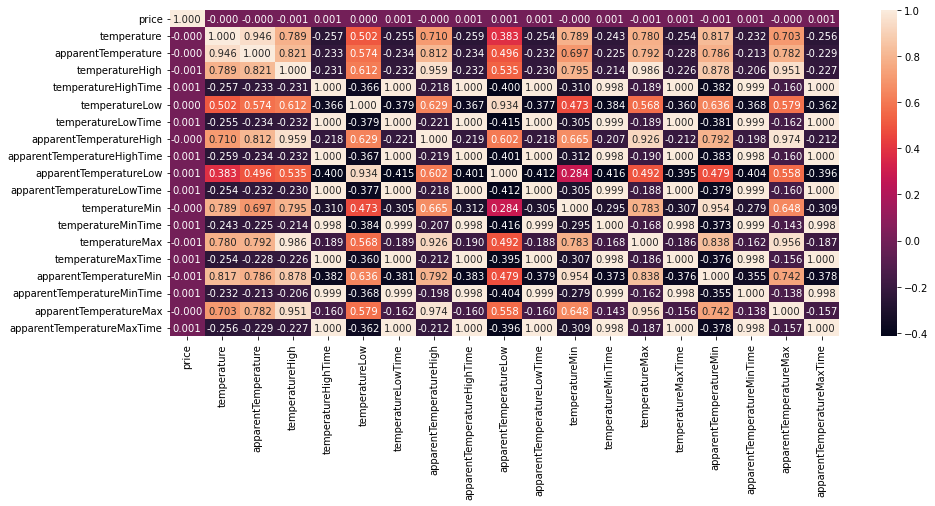

In [86]:
#See Correlation
plt.figure(figsize=(15,6))
correlation = df_merge[['price'] + temp_feature].corr()
sns.heatmap(correlation, annot=True, fmt='.3f')

**Conclusion:** There is a weak correlation between price and temperature feature (value around 0). Thus, we didnt need temperature feature in order to predict the price. 

In [87]:
#Drop temperature feature from data set 
df_merge.drop(temp_feature, axis=1, inplace=True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                637976 non-null  int64  
 1   month               637976 non-null  int64  
 2   cab_type            637976 non-null  int64  
 3   price               637976 non-null  float64
 4   distance            637976 non-null  float64
 5   surge_multiplier    637976 non-null  float64
 6   precipIntensity     637976 non-null  float64
 7   precipProbability   637976 non-null  float64
 8   humidity            637976 non-null  float64
 9   windSpeed           637976 non-null  float64
 10  windGust            637976 non-null  float64
 11  windGustTime        637976 non-null  int64  
 12  visibility          637976 non-null  float64
 13  dewPoint            637976 non-null  float64
 14  pressure            637976 non-null  float64
 15  windBearing         637976 non-nul

In [88]:
#Data set first 5 row 
df_merge.head()

hour  month  cab_type  price  distance  surge_multiplier  precipIntensity  \
0     2     11         0   11.0      0.44               1.0           0.1299   
1     1     11         0    7.0      0.44               1.0           0.0000   
2     4     11         0   26.0      0.44               1.0           0.0000   
3     3     11         0    9.0      0.44               1.0           0.0000   
4    18     12         0   16.5      0.44               1.0           0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                1.0      0.94      11.98     11.98    1543291200       4.786   
1                0.0      0.75       7.33      7.33    1543334400      10.000   
2                0.0      0.73       5.28      5.28    1543514400      10.000   
3                0.0      0.70       9.14      9.14    1543446000      10.000   
4                0.0      0.84       7.19      8.88    1545022800       8.325   

   dewPoint  pressure  windBearing  cloudCover  uvIndex  visibility.1  ozone  \
0     41.83   1003.97           90        1.00        0         4.786  291.1   
1     31.10    992.28          240        0.03        0        10.000  315.7   
2     26.64   1013.73          310        0.00        0        10.000  291.1   
3     28.61    998.36          303        0.44        0        10.000  347.7   
4     34.41   1000.46          294        1.00        1         8.325  335.8   

   sunriseTime  sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  \
0   1543232969  1543266992       0.64              0.1300   1543251600   
1   1543319437  1543353364       0.68              0.1064   1543338000   
2   1543492370  1543526114       0.75              0.0000   1543507200   
3   1543405904  1543439738       0.72              0.0001   1543420800   
4   1545048523  1545081282       0.33              0.0221   1545066000   

   Is_Raining  service_class  day_number  Is_Peak  
0           1              4           2        0  
1           0              2           3        0  
2           0              6           5        0  
3           0              3           4        0  
4           0              5           1        0

## See correlation between Remaining  Feature (PrecipIntensity, Vissibillity, etc) with Price

In [89]:
#Get remaining feature
columns = df_merge.columns.tolist()
remaining_feature = columns[6:25]
remaining_feature

['precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime']

<AxesSubplot:>

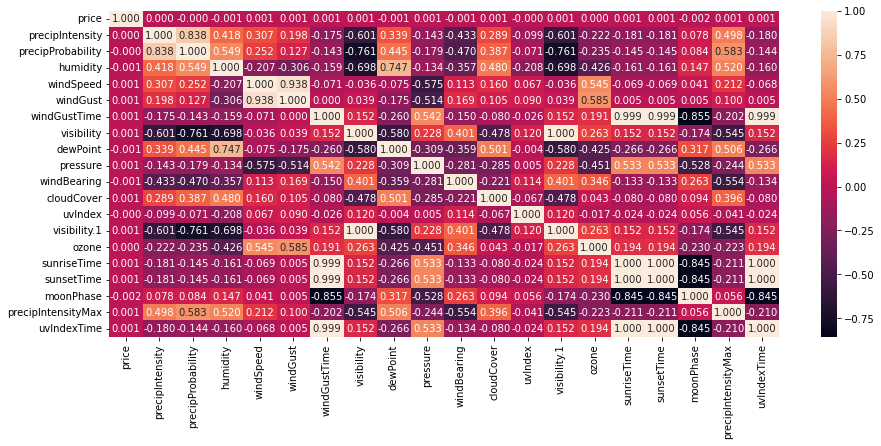

In [90]:
#See Correlation 
plt.figure(figsize=(15,6))
correlation = df_merge[['price'] + remaining_feature].corr()
sns.heatmap(correlation, annot=True, fmt='.3f')

**Conclusion:** The remaining feature is weakly correlated with price feature. Thus we should drop the feature.

In [91]:
#Drop Remaining Feature
df_merge.drop(remaining_feature, axis=1, inplace=True)

In [92]:
#Data Set info After dropping the Data 
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   month             637976 non-null  int64  
 2   cab_type          637976 non-null  int64  
 3   price             637976 non-null  float64
 4   distance          637976 non-null  float64
 5   surge_multiplier  637976 non-null  float64
 6   Is_Raining        637976 non-null  int64  
 7   service_class     637976 non-null  int64  
 8   day_number        637976 non-null  int64  
 9   Is_Peak           637976 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 48.7 MB


In [93]:
df_merge.head()

hour  month  cab_type  price  distance  surge_multiplier  Is_Raining  \
0     2     11         0   11.0      0.44               1.0           1   
1     1     11         0    7.0      0.44               1.0           0   
2     4     11         0   26.0      0.44               1.0           0   
3     3     11         0    9.0      0.44               1.0           0   
4    18     12         0   16.5      0.44               1.0           0   

   service_class  day_number  Is_Peak  
0              4           2        0  
1              2           3        0  
2              6           5        0  
3              3           4        0  
4              5           1        0

## Stepwise Regression for Feature Selection

For feature selection we will be using stepwise regression by looking at its P-Value. We assume that the null hypothesis is not statistically correlated. Meaning that if the P value is less than alpha (Set 0.05), then the feature is statistically significant.

In [94]:
#Get Feature and Target 
feature = (df_merge.drop('price', axis=1)).columns.tolist()
y = df_merge['price']
feature

['hour',
 'month',
 'cab_type',
 'distance',
 'surge_multiplier',
 'Is_Raining',
 'service_class',
 'day_number',
 'Is_Peak']

In [95]:
def get_feature(): 
    x = df_merge[feature]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_feature()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          2.287e+06
Date:                Wed, 26 Oct 2022   Prob (F-statistic):                        0.00
Time:                        22:38:26   Log-Likelihood:                     -1.6656e+06
No. Observations:              637976   AIC:                                  3.331e+06
Df Residuals:                  637967   BIC:                                  3.331e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

**Conclusion:** There is no P-Value (P > |t|) which is greater than 0.05. Thus, we can reject the null hypothesis and conclude that all remaining feature is important in building the machine learning model.

## Multicollinearity Check for Selected Feature

<AxesSubplot:>

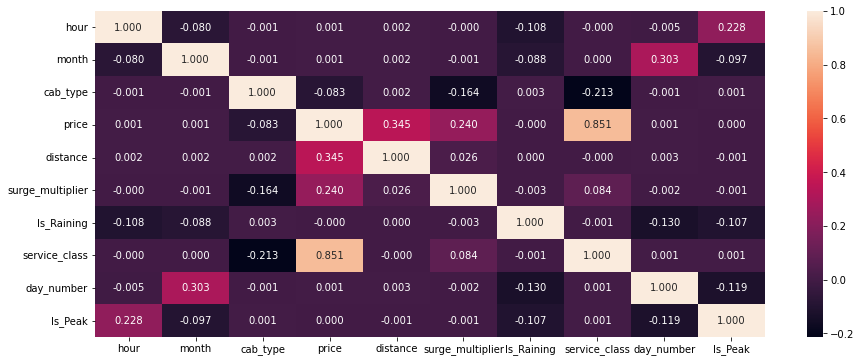

In [97]:
#See Correlation between Feature 
plt.figure(figsize=(15,6))
correlation = df_merge.df_mergerop.corr()
sns.heatmap(correlation, annot=True, fmt='.3f')

There is no multicollinearity in the final features

# Split Train Test Model

In [98]:
#Split Train Test 80% and 20%
from sklearn.model_selection import train_test_split

X = df_merge.drop('price', axis=1)
Y = df_merge['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [100]:
#Lookout for value of train test 
print(f'X_train percentage {(len(X_train)/len(df_merge))*100}%')
print(f'X_test percentage {(len(X_test)/len(df_merge))*100}%')
print(f'y_train percentage {(len(y_train)/len(df_merge))*100}%')
print(f'y_test percentage {(len(y_test)/len(df_merge))*100}%')

X_train percentage 79.99987460343337%
X_test percentage 20.00012539656664%
y_train percentage 79.99987460343337%
y_test percentage 20.00012539656664%


# Train Model

In [125]:
from sklearn.linear_model import LinearRegression, Lasso

lr = LinearRegression()
lasso = Lasso()
#Fit the model 
lr.fit(X_train,y_train)
lasso.fit(X_train, y_train)

Lasso()

In [128]:
#Prediction for Test Data (LinReg)
y_predict = lr.predict(X_test)

In [129]:
#Prediction for Training Data (LinReg)
y_predict_train = lr.predict(X_train)

In [130]:
#Prediction for Test Data (lasso)
y_predict_las = lasso.predict(X_test)

In [131]:
#Prediction for Training Data (lasso)
y_predict_train_las = lasso.predict(X_train)

# Model Evaluation

## Testing Data Error

In [132]:
#R2 and RMSE Score 
from sklearn.metrics import r2_score, mean_squared_error

print('Linear Regression Evaluation')
print(f'R2 Score from Model : {r2_score(y_predict, y_test)}')
print(f'RMSE Score from Model : {np.sqrt(mean_squared_error(y_predict, y_test))}')
print('')
print('Lasso Regression Evaluation')
print(f'R2 Score from Model : {r2_score(y_predict_las, y_test)}')
print(f'RMSE Score from Model : {np.sqrt(mean_squared_error(y_predict_las, y_test))}')

Linear Regression Evaluation
R2 Score from Model : 0.8700776638127798
RMSE Score from Model : 3.154648828739769

Lasso Regression Evaluation
R2 Score from Model : 0.7511933794177227
RMSE Score from Model : 3.815813208398818


## Training Data Error

In [133]:
#R2 and RMSE Score 
from sklearn.metrics import r2_score, mean_squared_error

print('Linear Regression Evaluation')
print(f'R2 Score from Model : {r2_score(y_predict_train, y_train)}')
print(f'RMSE Score from Model : {np.sqrt(mean_squared_error(y_predict_train, y_train))}')
print('')
print('Lasso Regression Evaluation')
print(f'R2 Score from Model : {r2_score(y_predict_train_las, y_train)}')
print(f'RMSE Score from Model : {np.sqrt(mean_squared_error(y_predict_train_las, y_train))}')

Linear Regression Evaluation
R2 Score from Model : 0.8703384511581793
RMSE Score from Model : 3.162178077254572

Lasso Regression Evaluation
R2 Score from Model : 0.7483963741737554
RMSE Score from Model : 3.8480002493694414


**Conclusion:** Linear Regression is the better prediction model comparing to Lasso Regression. Thus, it would be selected for the deployment.

In [135]:
#Save Model to pickle file 
import pickle
#Save Model to disk 
pickle.dump(lr, open('model.pkl','wb'))

#Load model 
model = pickle.load(open('model.pkl','rb')) 

## Coefficient of Linear Regression 

In [122]:
# retrieve the coefficients

data = X_train
model = lr

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

feature  coefficient
0         intercept   -25.019428
1              hour     0.000193
2             month     0.001053
3          cab_type     2.413169
4          distance     2.801635
5  surge_multiplier    17.686771
6        Is_Raining     0.005310
7     service_class     5.142486
8        day_number    -0.001680
9           Is_Peak    -0.006312

The Equation for predicting price is equal to : 

`price` = 0.000193`hour` + 0.001053`month` + 2.413169`cab_type` + 2.801635`distance` + 17.686771`surge_multiplier` + 	0.005310`Is_Raining` + 5.142486`service_class` - 0.001680`day_number` - 0.006312`Is_Peak` - 25.019428

In [136]:
X_train.columns.tolist()

['hour',
 'month',
 'cab_type',
 'distance',
 'surge_multiplier',
 'Is_Raining',
 'service_class',
 'day_number',
 'Is_Peak']